In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
import pprint 
pp = pprint.PrettyPrinter(indent=4)

In [4]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.9 MB/s eta 0:00:00


In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [13]:
# import sentiment and graph data
sentiment_df_dtypes = {'id':'str', 'author':'str', 'score':'float', 'upvote_ratio':'float', 'num_comments':'int',
       'subreddit':'str', 'selftext':'str', 'comments':'object', 'post_sentiment_dict':'object',
       'post_pos_sentiment':'float', 'post_neg_sentiment':'float', 'post_compound_sentiment':'float'}
# change path as per your drive 
cornell_sentiment_df = pd.read_csv('processed_data/cornell/cornell_sentiment_new.csv', dtype=sentiment_df_dtypes, usecols=sentiment_df_dtypes.keys())


In [7]:
cornell_sentiment_df

,id,author,score,upvote_ratio,num_comments,subreddit,selftext,comments,post_sentiment_dict,post_pos_sentiment,post_neg_sentiment,post_compound_sentiment
0,udjiue,zo_wee_mama,290.0,0.95,51,Cornell,"I don’t go to Cornell, I got to NYU but I some...","[{'author': 'ConsistentScar9841', 'body': 'abs...","{'neg': 0.071, 'neu': 0.846, 'pos': 0.083, 'co...",0.083,0.071,0.1306
1,lrg3fl,zikachu11,340.0,0.99,35,Cornell,"In my FWS I was trying to be friendly, I remem...","[{'author': 'BRF-or-bust', 'body': 'COE checks...","{'neg': 0.077, 'neu': 0.834, 'pos': 0.089, 'co...",0.089,0.077,0.2748
2,nf2k9z,zikachu11,263.0,0.90,12,Cornell,"If you’re interested in girls, there’s really ...","[{'author': 'Itchy_Fudge_2134', 'body': 'Funny...","{'neg': 0.06, 'neu': 0.579, 'pos': 0.361, 'com...",0.361,0.060,0.9094
3,hdvn9a,you112233,918.0,0.99,68,Cornell,I summarized their summary with most of the bi...,"[{'author': 'pcsm12', 'body': 'Someone give th...","{'neg': 0.063, 'neu': 0.844, 'pos': 0.093, 'co...",0.093,0.063,0.9672
4,kr3old,yikayika,288.0,0.97,61,Cornell,I'm super successful in the eyes of a lot of p...,"[{'author': 'cornellmanletboy', 'body': ""I cer...","{'neg': 0.088, 'neu': 0.758, 'pos': 0.153, 'co...",0.153,0.088,0.9728
...,...,...,...,...,...,...,...,...,...,...,...,...
302,qp29en,AgreeableAstronomer,254.0,0.97,43,Cornell,[The Greenest Pilgrim U'Know 🦃🥧🙏🏻 on Twitter: ...,"[{'author': 'None', 'body': '[deleted]', 'scor...","{'neg': 0.182, 'neu': 0.798, 'pos': 0.02, 'com...",0.020,0.182,-0.9629
303,q0p56z,AGuineaHen,255.0,0.99,31,Cornell,Is it really stealing if he was on the Unlimit...,"[{'author': 'AGuineaHen', 'body': 'UPDATE: Ask...","{'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'comp...",0.000,0.185,-0.6739
304,a2ftbu,9986000min,358.0,0.99,18,Cornell,I was coming out of teagle and I spotted this ...,"[{'author': 'cornellanon1998', 'body': 'This m...","{'neg': 0.016, 'neu': 0.893, 'pos': 0.091, 'co...",0.091,0.016,0.7407
305,k8ocrl,9986000min,268.0,0.98,18,Cornell,fuck,"[{'author': 'a123bcer', 'body': 'SHIT', 'score...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,1.000,-0.5423


In [14]:
def compute_aggregated_comment_sentiment_simple(comment_list):
  res_dict = {'neg':0.0, 'pos':0.0, 'compound':0.0}
  for comment_dict in comment_list:
    comment_sentiment_dict = analyzer.polarity_scores(comment_dict['body'])
    res_dict['neg'] += comment_sentiment_dict['neg']
    res_dict['pos'] += comment_sentiment_dict['pos']
    res_dict['compound'] += comment_sentiment_dict['compound']

  return res_dict

In [15]:
cornell_sentiment_df['comments'] = cornell_sentiment_df['comments'].apply(lambda x: eval(x))
cornell_sentiment_df['agg_comment_sentiment_dict'] = cornell_sentiment_df['comments'].apply(lambda x: compute_aggregated_comment_sentiment_simple(x))
cornell_sentiment_df['post_sentiment_dict'] = cornell_sentiment_df['post_sentiment_dict'].apply(lambda x: eval(x))

In [16]:
cornell_sentiment_df['agg_comment_compound'] = cornell_sentiment_df['agg_comment_sentiment_dict'].apply(lambda x: x['compound'])
cornell_sentiment_df['agg_comment_pos']  = cornell_sentiment_df['agg_comment_sentiment_dict'].apply(lambda x: x['pos'])
cornell_sentiment_df['agg_comment_neg'] = cornell_sentiment_df['agg_comment_sentiment_dict'].apply(lambda x: x['neg'])

In [17]:
# import centrality data
centrality_df_dtype = {'author':'str', 'btw_centrality':'float', 'deg_centrality':'float',
       'eig_centrality':'float', 'pagerank':'float', 'clustering_coeff':'float'}

In [19]:
cornell_regression_df = cornell_sentiment_df[['author', 'post_pos_sentiment', 'post_neg_sentiment', 'num_comments',
       'post_compound_sentiment', 'agg_comment_compound', 'agg_comment_pos', 'agg_comment_neg', 'upvote_ratio']].merge(cornell_centrality_df, on='author', how='left')

In [20]:
cornell_regression_df

,author,post_pos_sentiment,post_neg_sentiment,num_comments,post_compound_sentiment,agg_comment_compound,agg_comment_pos,agg_comment_neg,upvote_ratio,btw_centrality,deg_centrality,eig_centrality,pagerank,clustering_coeff
0,zo_wee_mama,0.083,0.071,51,0.1306,3.2994,1.574,0.715,0.95,0.006753,0.005729,0.003807,0.000636,0.027778
1,zikachu11,0.089,0.077,35,0.2748,3.7362,1.219,0.812,0.99,0.008994,0.010821,0.046401,0.000636,0.036765
2,zikachu11,0.361,0.060,12,0.9094,4.3332,1.724,0.256,0.90,0.008994,0.010821,0.046401,0.000636,0.036765
3,you112233,0.093,0.063,68,0.9672,1.8849,1.775,1.070,0.99,0.002971,0.007002,0.015379,0.000636,0.054545
4,yikayika,0.153,0.088,61,0.9728,6.7601,1.625,0.391,0.97,0.007051,0.006365,0.006593,0.000636,0.022222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,AgreeableAstronomer,0.020,0.182,43,-0.9629,-3.6904,0.497,2.325,0.97,0.005573,0.007002,0.041005,0.000636,0.054545
303,AGuineaHen,0.000,0.185,31,-0.6739,0.5663,1.202,0.431,0.99,0.008455,0.006365,0.034583,0.000636,0.022222
304,9986000min,0.091,0.016,18,0.7407,1.3457,0.967,0.102,0.99,0.012065,0.012731,0.049373,0.000636,0.036842
305,9986000min,0.000,1.000,18,-0.5423,-2.5735,0.000,3.525,0.98,0.012065,0.012731,0.049373,0.000636,0.036842


In [21]:
cornell_regression_avg_df = cornell_regression_df.groupby('eig_centrality').mean()

<ipython-input-21-78772e619da0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cornell_regression_avg_df = cornell_regression_df.groupby('eig_centrality').mean()


In [22]:
cornell_regression_avg_df = cornell_regression_avg_df.reset_index()

In [23]:
cornell_regression_avg_df.columns

Index(['eig_centrality', 'post_pos_sentiment', 'post_neg_sentiment',
       'num_comments', 'post_compound_sentiment', 'agg_comment_compound',
       'agg_comment_pos', 'agg_comment_neg', 'upvote_ratio', 'btw_centrality',
       'deg_centrality', 'pagerank', 'clustering_coeff'],
      dtype='object')

In [24]:
# fit a univariate regression model
def fit_regression_line(y, X, regressor):
  model = sm.OLS(y, X)
  results = model.fit()

  param = results.params
  fitted = np.transpose(X) * param

  fig, ax = plt.subplots(figsize=(8,4))
  plt.plot(X, y, 'o')
  plt.plot(X, fitted ,'-', label='coefficient: ' + str(round(param[0], 2)))
  ax.set_xlabel(regressor)
  ax.set_ylabel('post_pos_sentiment')
  plt.legend()
  plt.show()

In [25]:
def fit_regression_line_intercept(y, X, regressor):
    X = sm.add_constant(X)  # adding a constant term for intercept
    model = sm.OLS(y, X)
    results = model.fit()

    param = results.params
    fitted = np.dot(X, param)

    fig, ax = plt.subplots(figsize=(8,4))
    plt.plot(X[:, 1], y, 'o')  # X[:, 1] since X[:, 0] is the constant term
    plt.plot(X[:, 1], fitted ,'-', label='intercept: ' + str(round(param[0], 2)) +
                                        ', coefficient: ' + str(round(param[1], 2)))
    ax.set_xlabel(regressor)
    ax.set_ylabel('post_pos_sentiment')
    plt.legend()
    plt.show()



---



In [26]:
# for all values of eig_centrality
X = cornell_regression_avg_df[['eig_centrality', 'num_comments']].values
y = cornell_regression_avg_df['agg_comment_pos'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.507
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.224
Time:                        20:51:07   Log-Likelihood:                -305.82
No. Observations:                 240   AIC:                             617.6
Df Residuals:                     237   BIC:                             628.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4838      0.079     18.857      0.0

In [29]:
# for all values of eig_centrality
cornell_regression_avg_df['ln_eig_centrality'] = np.log(cornell_regression_avg_df['eig_centrality'])
X = cornell_regression_avg_df[['ln_eig_centrality', 'num_comments', 'upvote_ratio']].values
y = cornell_regression_avg_df['agg_comment_compound'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     8.074
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           3.83e-05
Time:                        20:51:36   Log-Likelihood:                -548.55
No. Observations:                 240   AIC:                             1105.
Df Residuals:                     236   BIC:                             1119.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.2259      4.398     -3.462      0.0

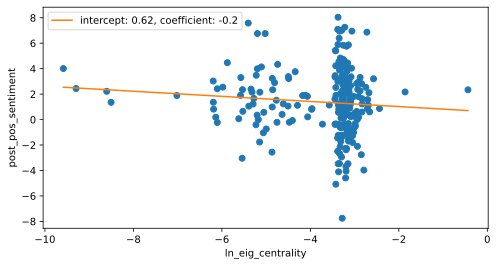

In [31]:
fit_regression_line_intercept(cornell_regression_avg_df['agg_comment_compound'].values, 
                              cornell_regression_avg_df['ln_eig_centrality'].values, 'ln_eig_centrality')